# Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dat = pd.read_csv('../Data/HMTG_pilot_2raters_5_6_22.csv', sep=',', index_col=0)
#dat = dat[~dat.rater_2.isna()]
len(dat.subject_id.unique())

52

In [6]:
# we need to drop subject 8 (observed IA) and 65 (observed GA), then we want to drop a random subject from those that observed MO and GR
#dat = dat[~dat.loc[dat.subject_id == 8]]
dat.drop(dat.index[dat['subject_id'] == 8], inplace=True)
dat.drop(dat.index[dat['subject_id'] == 65], inplace=True)
mosubs = dat.loc[dat.p2_strategy == 'MO'].subject_id.unique()
dat.drop(dat.index[dat['subject_id'] == mosubs[np.random.randint(len(mosubs))]], inplace=True)
grsubs = dat.loc[dat.p2_strategy == 'GR'].subject_id.unique()
dat.drop(dat.index[dat['subject_id'] == grsubs[np.random.randint(len(mosubs))]], inplace=True)
dat.groupby('trustee_id').agg(({"subject_id": "nunique"}))

,subject_id
trustee_id,
54,12
62,12
93,12
97,12


# Inter-rater agreement

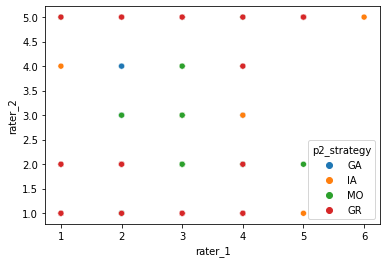

In [2]:
sns.scatterplot(x='rater_1', y='rater_2', hue='p2_strategy', data=dat.loc[(dat.probe_trl == True) & (dat.probe_num >=6)])

# Rater Accuracy

In [7]:
sKey = {'GR': 1, 'GA':2, 'IA':3, 'MO':4, 'IDK':5, 'Color':6}

for rater in ['rater_1', 'rater_2']:
    dat[rater+'_acc'] =  0
    # 1: GR
    # 2: GA
    # 3: IA
    # 4: MO
    # 5: ??

    for i, row in dat.loc[dat.probe_trl == True].iterrows():
        if sKey[row.p2_strategy] == row[rater]:
            dat.loc[i,rater+'_acc'] = 1


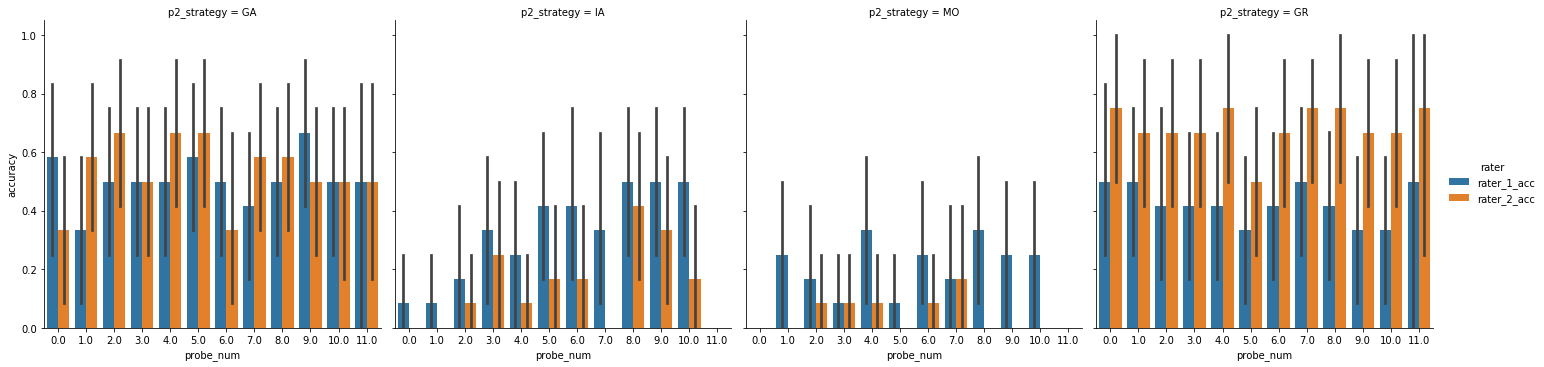

In [8]:
#rdat = dat.loc[(dat.probe_trl == True) & (dat.probe_num >= 6)].reset_index(drop=True)
rdat = dat.loc[dat.probe_trl == True].reset_index(drop=True)
rateDat = rdat.melt(value_vars=['rater_1_acc', 'rater_2_acc'],
                    id_vars=['trl', 'subject_id', 'p2_strategy', 'probe_num'],
                    var_name='rater', value_name='accuracy')

sns.catplot(x='probe_num', y='accuracy', hue='rater', kind='bar', col='p2_strategy', data=rateDat)

# Subject Accuracy

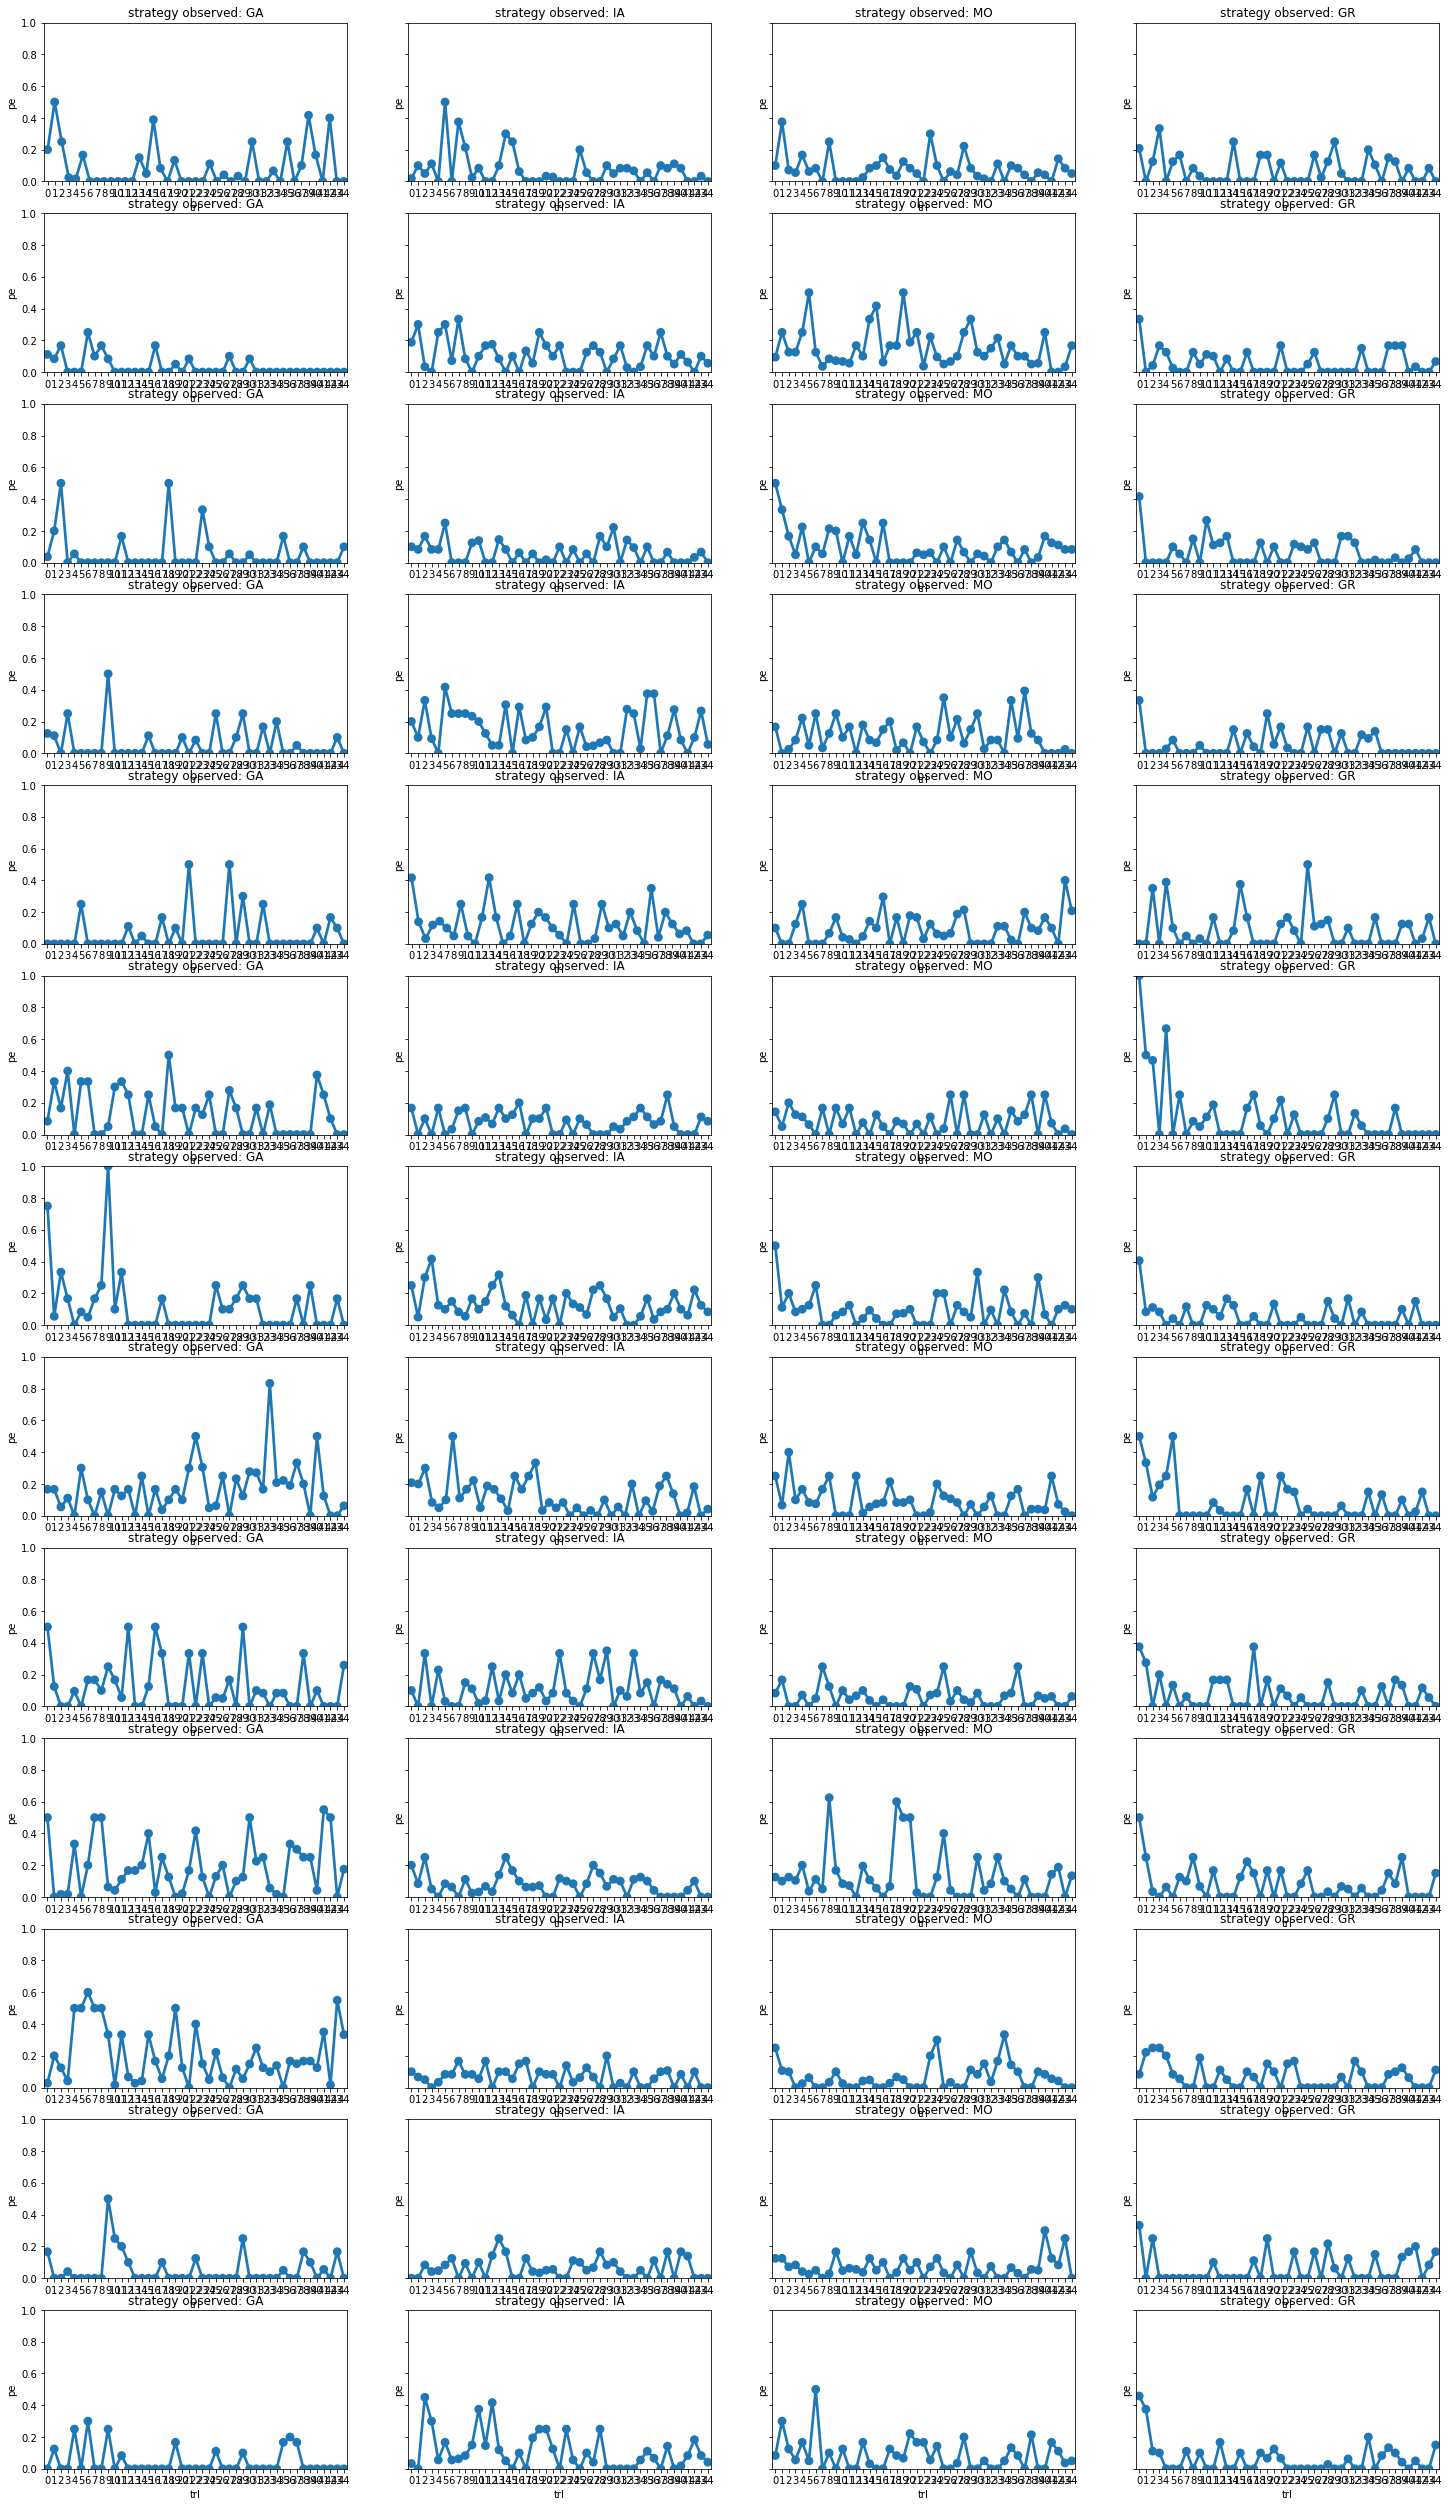

In [7]:
fig, ax = plt.subplots(figsize=(25, 45), nrows=13, ncols=4, sharey=True)
i = 0
for col, strategy in enumerate(dat.p2_strategy.unique()):
    ssubs = dat.loc[dat.p2_strategy == strategy].subject_id.unique()
    for row, subject in enumerate(ssubs):
        sdat = dat.loc[dat.subject_id == subject]
        sns.pointplot(x='trl', y='pe', ax=ax[row, col], data=sdat)
        ax[row, col].set_title('strategy observed: '+ sdat.p2_strategy.values[0])
        ax[row,col].set_ylim(ymin=0.0, ymax=1.0)

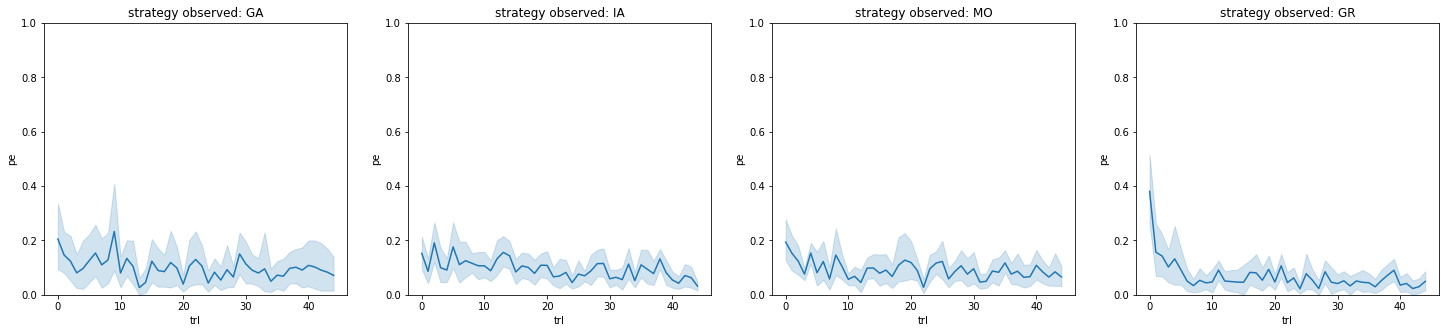

In [8]:
fig, ax = plt.subplots(figsize=(25, 5), ncols=4)
for col, strategy in enumerate(dat.p2_strategy.unique()):
    sdat = dat.loc[dat.p2_strategy == strategy]
    sns.lineplot(x='trl', y='pe', ax=ax[col], data=sdat)
    ax[col].set_title('strategy observed: '+ strategy)
    ax[col].set_ylim(ymin=0.0, ymax=1.0)

# distribution of probe frquency across subjects

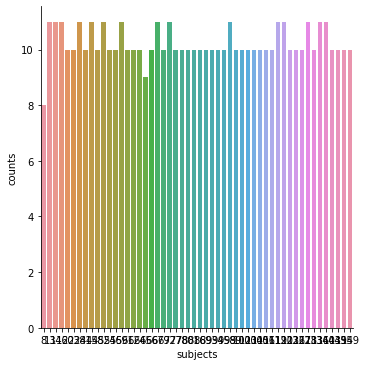

In [9]:
p_nums = {subj: dat.loc[dat.subject_id == subj].probe_num.max() for subj in dat.subject_id.unique()}
pp = pd.DataFrame(p_nums, index={'counts':[0]}).T.reset_index().rename(columns={'index':'subjects'})
sns.catplot(x='subjects', y='counts', data=pp, kind='bar')